# Домашнее задание

1. Генерим 21 сигналов (временных рядов), 3 класса по 7 образцов в каждом. 
Постарайтесь сделать их как можно более похожими, и в тоже время различными. 

1. Рассчитываем расстояние между ними по формуле Евклида и с помощью DTW

1. Описываем кратко полученные значения

1. Формируем из нагенеренных временных рядов набор данных для обучения

1. Разбиваем набор на train и test

1. Обучаем  классификаторы KNN с DTW, KNN со стандартной метрикой расстояния, TimeSeriesForest

1. Описываем кратко полученные результаты

In [222]:
import matplotlib.pyplot as plt
import numpy as np
import random

myseed = 7
random.seed(myseed)
np.random.seed(myseed)

# Генерация временных рядов

In [223]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

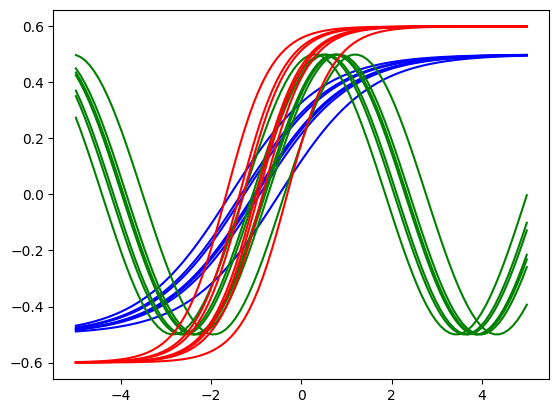

In [224]:
time = np.linspace(-5, 5, num=100)
N = 7
timeseries = {'time': time}
rand = np.random.random(size=7)

for i in range(N):
    timeseries[f'sigmoid{i}'] = sigmoid(time + 1.2 * rand[i] + 0.4) - 0.5
for i in range(N):
    timeseries[f'sin{i}'] = 0.5 * np.sin(time +  rand[i] + 0.3)
for i in range(N):
    timeseries[f'tanh{i}'] = 0.6 * np.tanh(time + rand[i] * 1.5 + 0.2)

for i in range(N):
    plt.plot(time, timeseries[f'sigmoid{i}'], '-b')
for i in range(N):
    plt.plot(time, timeseries[f'sin{i}'], '-g')
for i in range(N):
    plt.plot(time, timeseries[f'tanh{i}'], '-r')

# Считаем расстояние

In [225]:
from scipy.spatial.distance import euclidean

euclidean_dist = np.array([])

for i in range(1, 4):
    x = np.abs(timeseries[f"sin{i}"])
    y = np.abs(timeseries[f"sin{i - 1}"])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"расстояние euclidean для объектов sin {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries[f"sigmoid{i}"])
    y = np.abs(timeseries[f"sigmoid{i - 1}"])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"расстояние euclidean для объектов sigmoid {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries[f"tanh{i}"])
    y = np.abs(timeseries[f"tanh{i - 1}"])
    distance = euclidean(x, y)
    euclidean_dist = np.append(euclidean_dist, distance)
    print(f"расстояние euclidean для объектов tanh {i} и {7 - i}:", distance)

x = np.abs(timeseries[f"sin1"])
y = np.abs(timeseries[f"sigmoid1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов sin1 и sigmoid1:", distance)

x = np.abs(timeseries[f"tanh1"])
y = np.abs(timeseries[f"sigmoid1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов tanh1 и sigmoid1:", distance)

x = np.abs(timeseries["tanh1"])
y = np.abs(timeseries["sin1"])
distance = euclidean(x, y)
euclidean_dist = np.append(euclidean_dist, distance)
print(f"расстояние euclidean для объектов tanh1 и sin1:", distance)


расстояние euclidean для объектов sin 1 и 6: 2.0631203069550597
расстояние euclidean для объектов sin 2 и 5: 1.1278329618817642
расстояние euclidean для объектов sin 3 и 4: 0.9514304562636549
расстояние euclidean для объектов sigmoid 1 и 6: 0.9596364064287559
расстояние euclidean для объектов sigmoid 2 и 5: 0.4974177049666683
расстояние euclidean для объектов sigmoid 3 и 4: 0.4198523384907035
расстояние euclidean для объектов tanh 1 и 6: 1.6280456052196917
расстояние euclidean для объектов tanh 2 и 5: 0.9649904149155647
расстояние euclidean для объектов tanh 3 и 4: 0.8266694640780555
расстояние euclidean для объектов sin1 и sigmoid1: 2.0400824308867542
расстояние euclidean для объектов tanh1 и sigmoid1: 1.6071538790352204
расстояние euclidean для объектов tanh1 и sin1: 2.7443462634311016


In [226]:
from dtaidistance import dtw

dtw_dist = np.array([])

for i in range(1, 4):
    x = np.abs(timeseries[f"sin{i}"])
    y = np.abs(timeseries[f"sin{i - 1}"])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов sin {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries[f"sigmoid{i}"])
    y = np.abs(timeseries[f"sigmoid{i - 1}"])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов sigmoid {i} и {7 - i}:", distance)

for i in range(1, 4):
    x = np.abs(timeseries[f"tanh{i}"])
    y = np.abs(timeseries[f"tanh{i - 1}"])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов tanh {i} и {7 - i}:", distance)

x = np.abs(timeseries[f"sin1"])
y = np.abs(timeseries[f"sigmoid1"])
distance = dtw.distance(x, y)
dtw_dist = np.append(dtw_dist, distance)
print(f"расстояние dtw для объектов sin1 и sigmoid1:", distance)

x = np.abs(timeseries[f"tanh1"])
y = np.abs(timeseries[f"sigmoid1"])
distance = dtw.distance(x, y)
dtw_dist = np.append(dtw_dist, distance)
print(f"расстояние dtw для объектов tanh1 и sigmoid1:", distance)

x = np.abs(timeseries["tanh1"])
y = np.abs(timeseries["sin1"])
distance = dtw.distance(x, y)
dtw_dist = np.append(dtw_dist, distance)
print(f"расстояние dtw для объектов tanh1 и sin1:", distance)

расстояние dtw для объектов sin 1 и 6: 0.5544653442503498
расстояние dtw для объектов sin 2 и 5: 0.2748059928782327
расстояние dtw для объектов sin 3 и 4: 0.19808024093565443
расстояние dtw для объектов sigmoid 1 и 6: 0.05438752024146392
расстояние dtw для объектов sigmoid 2 и 5: 0.013942121352301736
расстояние dtw для объектов sigmoid 3 и 4: 0.05042794488278151
расстояние dtw для объектов tanh 1 и 6: 0.09699881486393194
расстояние dtw для объектов tanh 2 и 5: 0.015470309681691882
расстояние dtw для объектов tanh 3 и 4: 0.051016738913542956
расстояние dtw для объектов sin1 и sigmoid1: 1.4743064276641764
расстояние dtw для объектов tanh1 и sigmoid1: 0.8660808984146026
расстояние dtw для объектов tanh1 и sin1: 2.059316218325598


In [227]:
diff = euclidean_dist - dtw_dist
print("на сколько в среднем евклидова метрика больше dtw: ", np.mean(diff)) 
print(diff)

на сколько в среднем евклидова метрика больше dtw:  0.8434399716790555
[1.50865496 0.85302697 0.75335022 0.90524889 0.48347558 0.36942439
 1.53104679 0.94952011 0.77565273 0.565776   0.74107298 0.68503005]


Делаем вывод, что метрика метрика dtw точнее показывает расстояние между нашими классами, чем евклидова.

# Формируем набор данных для обучения

In [228]:
X = [] 
Y = []
for v in timeseries:
    if v!= 'time':
        X.append(timeseries[v])
        c = v[:-1]
        if c == "sigmoid":
            Y.append(1)
        elif c == "sin":
            Y.append(2)
        else: Y.append(3)
Y

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

# Разбиваем на train и test

In [229]:
arr = np.arange(len(Y))
np.random.shuffle(arr)

X_train = []
X_test = []
Y_train = []
Y_test = []

for i in arr[:-6]:
    X_train.append(X[i])
    Y_train.append(Y[i])
for i in arr[len(X_train):]:
    X_test.append(X[i])
    Y_test.append(Y[i])

Y_train, Y_test 

([1, 3, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 2, 3, 1], [1, 1, 2, 2, 2, 3])

# Обучаем

In [230]:
# dtw метрика
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


In [231]:
# стандартная метрика
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


In [232]:
# forest
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, Y_train)


print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0.858 0.038 0.104]]
Истинный класс для предсказаний 1
2 объект:
Вектор вероятности принадлежности к классам [[0.992 0.004 0.004]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0.138 0.798 0.064]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0.056 0.91  0.034]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[0.046 0.926 0.028]]
Истинный класс для предсказаний 2
6 объект:
Вектор вероятности принадлежности к классам [[0.31  0.062 0.628]]
Истинный класс для предсказаний 3


Все классификаторы успешно справились с задачей и правильно предсказали классы всех объектов test выборки.